In [ ]:
import numpy as np
from collections import Counter

In [ ]:
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

In [ ]:
def train_test_split(X, y, test_size = 0.2, random_state = 42):
  np.random.seed(random_state)
  n_samples = len(X)
  indices = np.random.permutation(n_samples)
  test_count = int(n_samples * test_size)
  test_indices = indices[:test_count]
  train_indices = indices[test_count:]
  return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

In [ ]:
class NaiveBayes:

  def __init__(self):

    self.classes = None

    self.prior = {}

    self.mean = {}

    self.variance = {}


  def fit(self, X, y):
    self.classes = np.unique(y)

    for c in self.classes:
      X_c = X[y==c]

      self.prior[c] = len(X_c)/len(X)
      self.mean[c] = np.mean(X_c, axis = 0)
      self.variance[c] = np.var(X_c, axis = 0)

  def _gaussian(self, x, mean, variance):
    eps = 1e-9
    numerator = np.exp(-(x-mean)**2/2*variance + eps)
    denominator = np.sqrt(2*np.pi*variance + eps)

    return numerator / denominator


  def _predict_one(self, x):
    posteriors = {}

    for c in self.classes:
      prior = np.log(self.prior[c])
      likelihood = np.sum(
          np.log(
              self._gaussian(x, self.mean[c], self.variance[c])
          )
      )

      posteriors[c] = prior + likelihood

    return max(posteriors, key = posteriors.get)

  def predict(self, X):
    predictions = []
    for x in X:
      predictions.append(self._predict_one(x))

    return np.array(predictions)

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples = 500,
    n_features = 2,
    n_informative = 2,
    n_redundant = 0,
    random_state = 42
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
model = NaiveBayes()
model.fit(X_train, y_train)

In [ ]:
predictions = model.predict(X_test)
acc = accuracy(y_test, predictions)
print("Accuracy: ", acc)

Accuracy:  0.88


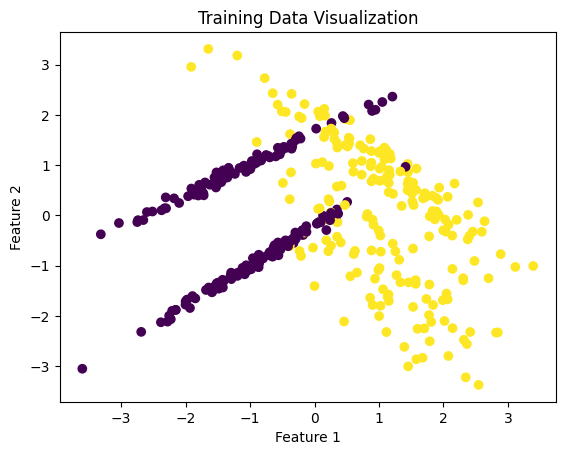

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(
    X_train[:,0],
    X_train[:,1],
    c=y_train
)

plt.title("Training Data Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()


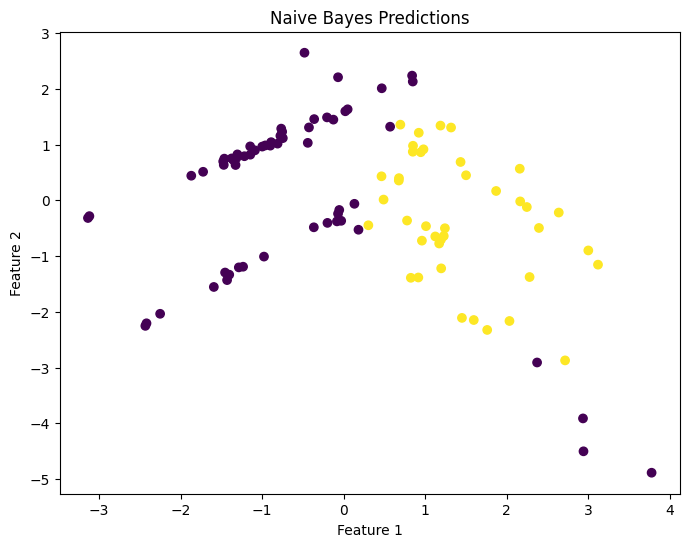

In [ ]:
plt.figure(figsize=(8,6))

plt.scatter(
    X_test[:,0],
    X_test[:,1],
    c=predictions
)

plt.title("Naive Bayes Predictions")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()


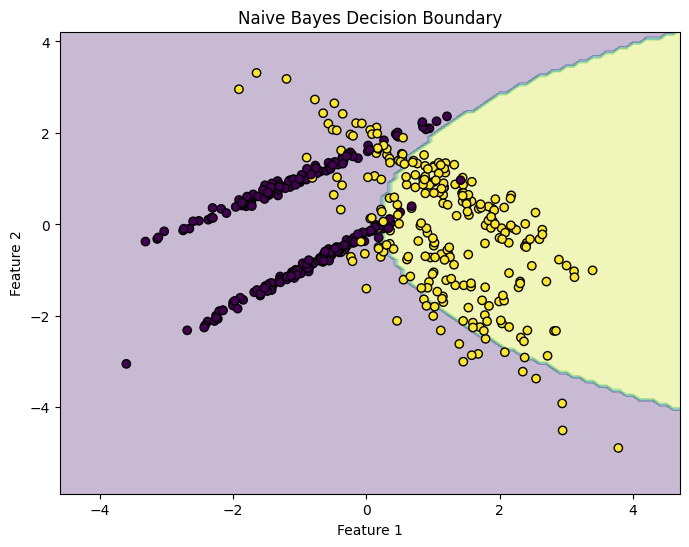

In [ ]:
h = 0.1

x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

grid = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(grid)

Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))

plt.contourf(xx, yy, Z, alpha=0.3)

plt.scatter(
    X[:,0],
    X[:,1],
    c=y,
    edgecolor='k'
)

plt.title("Naive Bayes Decision Boundary")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()